**건강검진 데이터 시각화하기**
---
> **목차(Context)**

* 데이터 살펴보기
* EDA

In [4]:
### 개발환경 세팅하기

# ▶ 한글 폰트 다운로드
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [5]:
# # ▶ 한글 폰트 설정하기
# import matplotlib.pyplot as plt
# plt.rc('font', family='NanumBarunGothic')
# plt.rcParams['axes.unicode_minus'] =False

# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# # ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
# from google.colab import drive
# drive.mount('/content/drive')

## **데이터 준비하기**
---

> **데이터 준비하기**

- 데이터 출처 : [공공데이터 포털](https://www.data.go.kr/data/15007122/fileData.do#/layer_data_infomation) `국민건강보험공단_건강검진정보`

    - 본 미션에서는 2022년 버전을 사용합니다. '국민건강보험공단_건강검진정보_20221231.CSV' 파일을 찾아 import 해주세요.

- 데이터 명세  

| No. | 표준항목명          | 영문명            | 설명                                                                                                           | 표현형식/단위          | 예시         |
|-----|-----------------|------------------|---------------------------------------------------------------------------------------------------------------|---------------------|--------------|
| 1   | 기준년도          | HCHK_YEAR        | 해당 정보의 기준년도를 제공함                                                                                  | YYYY                | 2009         |
| 2   | 가입자일련번호       | IDV_ID           | 해당가입자에 부여한 일련번호                                                                                  | 1 ~ 1,000,000       | 1            |
| 3   | 시도코드          | SIDO             | 해당 수진자 거주지의 시도코드                                                                                  | -                   | 26           |
| 4   | 성별              | SEX              | 해당 정보 대상자의 성별을 제공함                                                                               | 성별 : 1(남자), 2(여자) | 1            |
| 5   | 연령대코드(5세단위)    | AGE_GROUP        | 기준년도에 수진자의 나이를 5세 단위로 그룹화하여 구분한 코드                                                     | 5세 단위 그룹화, 85세 이상은 85+로 그룹화 | -            |
| 6   | 신장(5cm단위)     | HEIGHT           | 검진자의 키(5CM 단위)                                                                                          | N/Cm                | 140          |
| 7   | 체중(5kg단위)     | WEIGHT           | 검진자의 몸무게(5KG 단위)                                                                                      | N/Kg                | 45           |
| 8   | 허리둘레          | WAIST            | 검진자의 허리둘레                                                                                              | N/Cm                | 82           |
| 9   | 시력(좌)          | SIGHT_LEFT       | 수검자의 좌측 눈의 시력                                                                                        | N                   | 0.5          |
| 10  | 시력(우)          | SIGHT_RIGHT      | 수검자의 우측 눈의 시력                                                                                        | N                   | 0.5          |
| 11  | 청력(좌)          | HEAR_LEFT        | 수검자의 좌측 귀의 청력                                                                                        | N                   | 1            |
| 12  | 청력(우)          | HEAR_RIGHT       | 수검자의 우측 귀의 청력                                                                                        | N                   | 1            |
| 13  | 수축기혈압         | BP_HIGH          | 검진자의 최고 혈압으로 심장이 수축해서 강한 힘으로 혈액을 동맥에 보낼 때의 혈관 내압                                   | N/mmHg              | 140          |
| 14  | 이완기혈압         | BP_LWST          | 검진자의 최저 혈압으로 심장의 완기시의 혈압                                                                      | N/mmHg              | 81           |
| 15  | 식전혈당(공복혈당)    | BLDS             | 검진자 식사 전 혈당(혈액 100ml당 함유 되어 있는 포도당의 농도) 수치                                               | N/mg/dL             | 94           |
| 16  | 총콜레스테롤        | TOT_CHOLE        | 혈청 중의 에스텔형, 비에스테형(유리)콜레스테롤의 합                                                               | N/mg/dL             | 164          |
| 17  | 트리글리세라이드    | TRIGLYCERIDE     | 단순지질 혹은 중성지질을 뜻함                                                                                    | N/mg/dL             | 94           |
| 18  | HDL콜레스테롤      | HDL_CHOLE        | HDL(고밀도 리포단백질)에 포함되는 콜레스테롤                                                                      | N/mg/dL             | 45           |
| 19  | LDL콜레스테롤      | LDL_CHOLE        | LDL(저밀도 리포단백질)에 함유된 콜레스테롤                                                                        | N/mg/dL             | 150, 130     |
| 20  | 혈색소            | HMG              | 혈액이나 혈구 속에 존재하는 색소단백으로 글로빈(globin)과 엠(heme)으로 구성되며 혈중의 산소운반체로서의 역할 수행       | N/g/dL              | 15.3984375   |
| 21  | 요단백            | OLIG_PROTE_CD    | 소변에 단백질이 섞여 나오는 것                                                                                  | N                   | 1            |
| 22  | 혈청크레아티닌       | CREATININE       | 크레아틴의 탈수물로 내인성 단백대사의 종말산물로서 신장에서 배설되고 그 증감은 음식물에 관계없이 근육의 발육과 운동에 관계함 | N/mg/dL             | 0.8          |
| 23  | 혈청지오티(AST)    | AST              | 간 기능을 나타내는 혈액검사상의 수치, 간세포 이외에 심장, 신장, 뇌, 근육 등에도 존재하는 효소로 이러한 세포들이 손상을 받는 경우 농도가 증가함 | N/IU/L              | 12           |
| 24  | 혈청지피티(ALT)    | ALT              | 간 기능을 나타내는 혈액검사상의 수치, ALT는 주로 간세포 안에 존재하는 효소로, 간세포가 손상을 받는 경우 농도가 증가함        | N/U/L               | 15           |
| 25  | 감마지티피         | GAMMA_GTP        | 간 기능을 나타내는 혈액검사상의 수치, 간 내의 쓸개관(담관)에 존재하는 효소로 글루타민산을 외부에 펩티드나 아미노산 등으로 옮기는 작용을 함 | N/U/L               | 119, 114     |
| 26  | 흡연상태           | SMK_STAT_TYPE_CD | 해당 수검자의 흡연 상태 여부                                                                                    | N                   | 1            |
| 27  | 음주여부           | DRK_YN           | 해당 수검자의 음주 상태 여부                                                                                    | N/Y                 | 1            |
| 28  | 구강검진수검여부     | HCHK_OE_INSPEC_YN | 해당 검진자가 구강검진을 선택하여 검진하였는지 여부에 대한 항목                                                   | N/Y                 | 1            |
| 29  | 치아우식증유무       | CRS_YN           | 해당 수검자의 치아우식증 유무                                                                                   | N                   | 1            |
| 30  | 치석              | TTR_YN           | 해당 수검자의 치석 여부                                                                                         | N/Y                 | 1            |

     


In [6]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [7]:
# Pandas 보기 옵션
pd.set_option('display.max_columns',100)

### 문제1. 데이터 불러오기
: 제공된 `./국민건강보험공단_건강검진정보_20221231.CSV` 파일을 불러오세요. 한글 폰트가 깨질 경우, 인코딩을 확인해보세요.

In [8]:
df = pd.read_csv("D:\suhyeon\Workspace\codeit-bootcamp-DA13\data\국민건강보험공단_건강검진정보_20221231.csv.CSV", encoding = 'cp949')

## **EDA : Data 살펴보기**  
---

* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  

### 전체적인 데이터 살펴보기

#### 문제2. 데이터의 형태를 확인해보세요.
- 몇 개의 데이터가 존재하나요?
- 몇 개의 특성이 존재하나요?

- 1000000의 데이터가 존재합니다.
- 30개의 특성이 존재합니다.

In [9]:
# Data 형태 확인
df.shape


(1000000, 30)

#### 문제3. 데이터의 타입을 확인해보세요.
- 어떤 특성들이 데이터에 포함되어 있나요?
- 각 특성의 값은 어떤 데이터 타입으로 구성되어 있나요?

- 건강검진 관련 컬럼과 개인정보 등의 데이터가 포함되어 있습니다.
- 정수와 실수로 구성되어 있습니다.

In [10]:
# Data type 확인
df.dtypes

기준년도             int64
가입자일련번호          int64
시도코드             int64
성별               int64
연령대코드(5세단위)      int64
신장(5cm단위)        int64
체중(5kg단위)        int64
허리둘레           float64
시력(좌)          float64
시력(우)          float64
청력(좌)          float64
청력(우)          float64
수축기혈압          float64
이완기혈압          float64
식전혈당(공복혈당)     float64
총콜레스테롤         float64
트리글리세라이드       float64
HDL콜레스테롤       float64
LDL콜레스테롤       float64
혈색소            float64
요단백            float64
혈청크레아티닌        float64
혈청지오티(AST)     float64
혈청지피티(ALT)     float64
감마지티피          float64
흡연상태           float64
음주여부           float64
구강검진수검여부         int64
치아우식증유무        float64
치석             float64
dtype: object

In [11]:
# 데이터 값 확인 - 상위 30행을 출력하여 데이터를 확인해보세요.
df.head(30)


,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
0,2022,702763,41,2,14,160,75,89.0,1.0,1.0,1.0,1.0,127.0,73.0,84.0,NaN,NaN,NaN,NaN,14.8,1.0,0.8,25.0,20.0,15.0,1.0,0.0,0,NaN,NaN
1,2022,765435,41,2,9,150,45,68.0,1.0,1.0,1.0,1.0,127.0,75.0,85.0,NaN,NaN,NaN,NaN,13.1,1.0,0.8,19.0,10.0,7.0,1.0,1.0,0,NaN,NaN
2,2022,343621,41,2,13,150,60,78.8,1.0,1.0,1.0,1.0,135.0,81.0,105.0,NaN,NaN,NaN,NaN,13.0,1.0,0.8,17.0,15.0,15.0,1.0,1.0,0,NaN,NaN
3,2022,3393534,41,2,6,160,50,69.0,1.0,1.0,1.0,1.0,109.0,70.0,81.0,NaN,NaN,NaN,NaN,13.4,1.0,0.8,25.0,16.0,13.0,1.0,1.0,0,NaN,NaN
4,2022,1716951,41,2,7,160,55,75.0,1.0,1.0,1.0,1.0,110.0,67.0,79.0,NaN,NaN,NaN,NaN,14.7,1.0,0.8,22.0,22.0,15.0,1.0,1.0,0,NaN,NaN
5,2022,4207013,41,1,7,170,85,93.5,1.0,1.0,1.0,1.0,136.0,89.0,92.0,NaN,NaN,NaN,NaN,15.8,1.0,0.8,19.0,31.0,29.0,1.0,1.0,0,NaN,NaN
6,2022,1773908,41,2,5,160,40,57.0,1.0,1.0,1.0,1.0,100.0,60.0,85.0,NaN,NaN,NaN,NaN,11.9,1.0,0.8,23.0,10.0,10.0,1.0,1.0,0,NaN,NaN
7,2022,4265572,41,1,7,180,65,74.8,1.0,1.0,1.0,1.0,110.0,80.0,94.0,NaN,NaN,NaN,NaN,16.5,1.0,0.8,13.0,10.0,19.0,1.0,1.0,0,NaN,NaN
8,2022,2303478,41,2,6,155,50,66.0,1.0,1.0,1.0,1.0,102.0,70.0,108.0,NaN,NaN,NaN,NaN,13.1,1.0,0.8,9.0,7.0,20.0,1.0,1.0,0,NaN,NaN
9,2022,4099406,41,2,6,165,55,68.0,1.0,1.0,1.0,1.0,120.0,80.0,85.0,NaN,NaN,NaN,NaN,15.4,1.0,0.8,32.0,33.0,20.0,1.0,1.0,0,NaN,NaN


총콜레스테롤	트리글리세라이드	HDL콜레스테롤	LDL콜레스테롤 치아우식증유무	치석 의 컬럼은 결측치가 많은 것으로 보입니다.

#### 문제4 : 결측치 확인하기
- 각 특성 별로 결측치 개수와 비율을 확인해보세요.
- 결측치의 양상이 특성마다 차이가 난다면, 왜 그런 차이가 발생했을까요?

- 결측치 0(완전한 데이터): 기준년도, 가입자일련번호, 성별, 연령대, 신장, 체중 둥. 
    - 이유: 건강검진을 받는 사람이라면 반드시 기입해야 하는 기본 행정 정보 및 신체 기본 계측치이기 때문이다.
- 결측치 약 5,500건 : 혈압, 식전혈당, 혈색소, 혈청크레아티닌 등. 
    - 이유 : 혈액 검사나 혈압 측정 단계에서 기기 오류가 발생했거나, 특정 사유로 기본 검진 항목 중 일부를 누락했을 가능성이 클 것으로 예상된다.
- 결측치 약 65만 건 이상(대규모 결측): 총콜레스테롤, 트리글리세라이드, HDL/LDL 콜레스테롤, 치아우식증유무 등.
    -  이유: 총콜레스테롤	트리글리세라이드	HDL콜레스테롤	LDL콜레스테롤은 앞부분은 결측치로 채워져 있느나 뒷부분이 채워져 있는 것을 보아 정책 변화 등에서 기인한 것으로 보인다. 치과 검진의 경우 일반 검진과 별도로 진행되는 경우가 많아 누락율이 높게 나타나는 것으로  예상된다.

=> 결측치 분포를 보아 하니, 해당 데이터셋은 정책변화와 같은 시계열적 변화와 수검자의 선택적 참여 특성이 강하게 반영되어 있다. 따라서 콜레스테롤이나 치과 관련 항목을 분석할 때는 결측치를 단순히 제거하기보다는, 해당 항목이 존재하는 유효 표본만을 분리하여 별도의 상관관계 분석을 진행하는 것이 데이터 왜곡을 줄이는 올바른 전략이라고 판단된다.

In [12]:
# 아래 예시는 결측치가 없는 열은 필터링해서 확인하였습니다
df.isna().sum()

기준년도                0
가입자일련번호             0
시도코드                0
성별                  0
연령대코드(5세단위)         0
신장(5cm단위)           0
체중(5kg단위)           0
허리둘레              392
시력(좌)             186
시력(우)             185
청력(좌)             115
청력(우)             116
수축기혈압            5556
이완기혈압            5556
식전혈당(공복혈당)       5611
총콜레스테롤         654382
트리글리세라이드       654386
HDL콜레스테롤       654386
LDL콜레스테롤       660926
혈색소              5616
요단백             11054
혈청크레아티닌          5615
혈청지오티(AST)       5613
혈청지피티(ALT)       5613
감마지티피            5611
흡연상태               96
음주여부               73
구강검진수검여부            0
치아우식증유무        655671
치석             655670
dtype: int64

#### 문제5 : 결측치 시각화하기
- 데이터프레임에서 결측치가 존재하는 부분을 시각화해보세요.

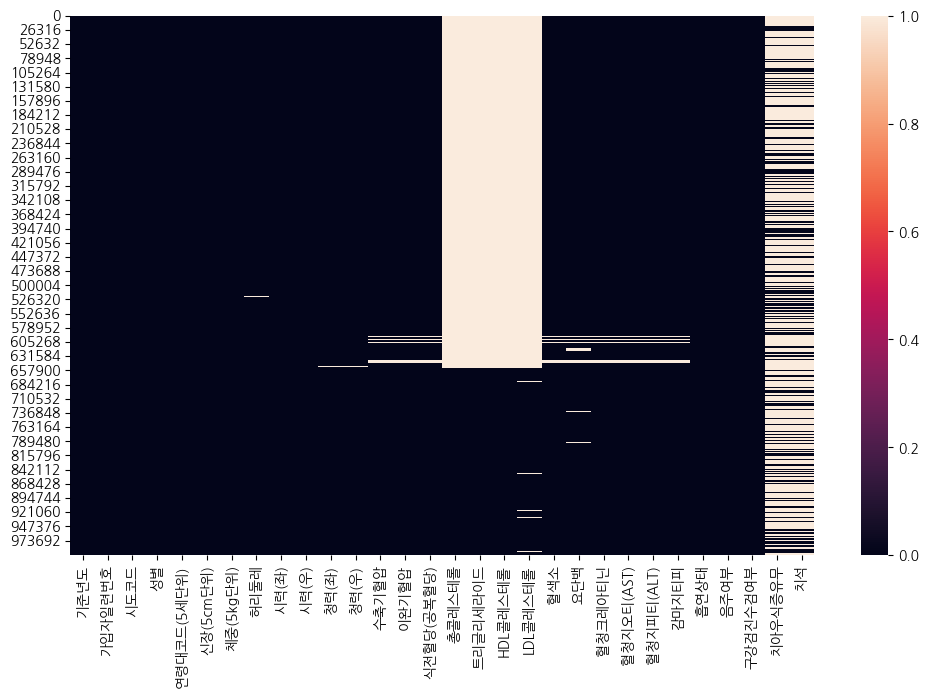

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull())
plt.show()

In [14]:
# 어떤 데이터에서 결측치가 관측되었나요? 해당 데이터는 어떻게 전처리하는 게 좋을까요?


- 결측치 관측: 시각화 결과, 총콜레스테롤, 트리글리세라이드, HDL/LDL 콜레스테롤 등 혈액 정밀 검사항목과 치아우식증유무, 치석 등 구강 검진 항목에서 대규모 결측이 관찰됐다. 특히 콜레스테롤 관련 항목들은 특정 행 구간에 집중적으로 결측치가 몰려 있는 블록 형태를 띠고 있다. 
- 전처리 방법: 해당 데이터들의 경우, 결측치 비율이 60%를 상회하므로, 전체 데이터를 대상으로 하는 분석에서는 해당 컬럼들을 삭제하는 것이 데이터의 신뢰성을 높이는 방법이다. 
혹은 콜레스테롤 관련 수치가 핵심 변수라면, 해당 데이터가 존재하는 2008년 의 수검자들만 따로 추출하는 분석 전략도 생각해 볼 수 있다.

#### 문제6 : 중복값 확인하기
- 데이터에 중복값이 있는 지 확인해보세요. 만약 있다면, 제거하세요.

- 중복값은 없는 것으로 확인된다.

In [15]:
df.duplicated().sum()

np.int64(0)

#### 문제7 : 연령대 코드 수정하기
- 현재 데이터는 연령대를 코드로 제공하고 있습니다. 연령대 코드가 의미하는 바는 다음 표와 같습니다.
- `연령대`라는 새로운 열을 만들고, 연령대 코드를 의미하는 연령대로 매핑해보세요.

In [16]:
df.columns

Index(['기준년도', '가입자일련번호', '시도코드', '성별', '연령대코드(5세단위)', '신장(5cm단위)',
       '체중(5kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석'],
      dtype='object')

In [17]:
# 연령대 코드 매핑
age_group_mapping = {
    1: "0-4", 2: "5-9", 3: "10-14", 4: "15-19", 5: "20-24",
    6: "25-29", 7: "30-34", 8: "35-39", 9: "40-44", 10: "45-49",
    11: "50-54", 12: "55-59", 13: "60-64", 14: "65-69", 15: "70-74",
    16: "75-79", 17: "80-84", 18: "85+"
}

In [18]:
# 연령대 코드를 새로운 매핑으로 업데이트 해보세요
# map(): 특정 열의 값을 딕셔너리의 키와 대조해서 값으로 한꺼번에 바꿔줌.
df['연령대'] = df['연령대코드(5세단위)'].map(age_group_mapping)


In [19]:
df.head(10)

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,연령대
0,2022,702763,41,2,14,160,75,89.0,1.0,1.0,1.0,1.0,127.0,73.0,84.0,NaN,NaN,NaN,NaN,14.8,1.0,0.8,25.0,20.0,15.0,1.0,0.0,0,NaN,NaN,65-69
1,2022,765435,41,2,9,150,45,68.0,1.0,1.0,1.0,1.0,127.0,75.0,85.0,NaN,NaN,NaN,NaN,13.1,1.0,0.8,19.0,10.0,7.0,1.0,1.0,0,NaN,NaN,40-44
2,2022,343621,41,2,13,150,60,78.8,1.0,1.0,1.0,1.0,135.0,81.0,105.0,NaN,NaN,NaN,NaN,13.0,1.0,0.8,17.0,15.0,15.0,1.0,1.0,0,NaN,NaN,60-64
3,2022,3393534,41,2,6,160,50,69.0,1.0,1.0,1.0,1.0,109.0,70.0,81.0,NaN,NaN,NaN,NaN,13.4,1.0,0.8,25.0,16.0,13.0,1.0,1.0,0,NaN,NaN,25-29
4,2022,1716951,41,2,7,160,55,75.0,1.0,1.0,1.0,1.0,110.0,67.0,79.0,NaN,NaN,NaN,NaN,14.7,1.0,0.8,22.0,22.0,15.0,1.0,1.0,0,NaN,NaN,30-34
5,2022,4207013,41,1,7,170,85,93.5,1.0,1.0,1.0,1.0,136.0,89.0,92.0,NaN,NaN,NaN,NaN,15.8,1.0,0.8,19.0,31.0,29.0,1.0,1.0,0,NaN,NaN,30-34
6,2022,1773908,41,2,5,160,40,57.0,1.0,1.0,1.0,1.0,100.0,60.0,85.0,NaN,NaN,NaN,NaN,11.9,1.0,0.8,23.0,10.0,10.0,1.0,1.0,0,NaN,NaN,20-24
7,2022,4265572,41,1,7,180,65,74.8,1.0,1.0,1.0,1.0,110.0,80.0,94.0,NaN,NaN,NaN,NaN,16.5,1.0,0.8,13.0,10.0,19.0,1.0,1.0,0,NaN,NaN,30-34
8,2022,2303478,41,2,6,155,50,66.0,1.0,1.0,1.0,1.0,102.0,70.0,108.0,NaN,NaN,NaN,NaN,13.1,1.0,0.8,9.0,7.0,20.0,1.0,1.0,0,NaN,NaN,25-29
9,2022,4099406,41,2,6,165,55,68.0,1.0,1.0,1.0,1.0,120.0,80.0,85.0,NaN,NaN,NaN,NaN,15.4,1.0,0.8,32.0,33.0,20.0,1.0,1.0,0,NaN,NaN,25-29


### 개별 데이터 살펴보기

#### 문제8 : 수치형 데이터와 범주형 데이터 구분하기
- 수치형 데이터와 범주형 데이터는 데이터를 살펴보는데 차이가 있습니다. 수치형 데이터와 범주형 데이터를 구분하세요.

In [20]:
df.columns

Index(['기준년도', '가입자일련번호', '시도코드', '성별', '연령대코드(5세단위)', '신장(5cm단위)',
       '체중(5kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석', '연령대'],
      dtype='object')

In [21]:
# 범주형 데이터 | 변수에 저장하는 과정 꼭 잊지 말 것. 
category_cols= df[['기준년도', '가입자일련번호', '시도코드', '성별', '연령대코드(5세단위)','흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석', '연령대']].astype('str')


In [22]:
# 수치형 데이터
numeric_cols = df[['신장(5cm단위)',
       '체중(5kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피']].astype('float')

In [23]:
category_cols.info()
numeric_cols.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   기준년도         1000000 non-null  object
 1   가입자일련번호      1000000 non-null  object
 2   시도코드         1000000 non-null  object
 3   성별           1000000 non-null  object
 4   연령대코드(5세단위)  1000000 non-null  object
 5   흡연상태         1000000 non-null  object
 6   음주여부         1000000 non-null  object
 7   구강검진수검여부     1000000 non-null  object
 8   치아우식증유무      1000000 non-null  object
 9   치석           1000000 non-null  object
 10  연령대          1000000 non-null  object
dtypes: object(11)
memory usage: 83.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   신장(5cm단위)   1000000 non-null  float64
 1   체중(5kg단위)   1000000 non-null  float64
 2 

In [24]:
# 수치형 변수의 기술 통계량
numeric_cols.describe()

,신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피
count,1000000.000000,1000000.000000,999608.000000,999814.000000,999815.000000,999885.000000,999884.000000,994444.000000,994444.000000,994389.000000,345618.000000,345614.000000,345614.000000,339074.000000,994384.000000,988946.000000,994385.000000,994387.000000,994387.000000,994389.000000
mean,162.631760,64.301000,81.422321,0.958738,0.957365,1.035089,1.033892,123.151976,75.766153,100.988888,197.984923,131.855564,56.865400,115.534046,14.214367,1.131239,0.836899,26.975235,26.604105,36.046350
std,9.359053,13.791024,11.056493,0.582629,0.576159,0.194757,0.191650,14.675753,10.252728,23.619450,42.969755,103.474645,15.415803,38.654386,1.547857,0.494855,0.348397,20.931586,25.606409,67.982649
min,130.000000,30.000000,7.600000,0.100000,0.100000,1.000000,1.000000,54.000000,10.000000,10.000000,42.000000,1.000000,1.000000,1.000000,0.100000,1.000000,0.040000,1.000000,0.000000,1.000000
25%,155.000000,55.000000,74.000000,0.700000,0.700000,1.000000,1.000000,113.000000,69.000000,89.000000,169.000000,75.000000,46.000000,89.000000,13.200000,1.000000,0.700000,19.000000,15.000000,15.000000
50%,165.000000,65.000000,81.000000,1.000000,1.000000,1.000000,1.000000,122.000000,76.000000,96.000000,197.000000,107.000000,55.000000,114.000000,14.200000,1.000000,0.800000,23.000000,21.000000,23.000000
75%,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,132.000000,82.000000,106.000000,225.000000,157.000000,65.000000,140.000000,15.300000,1.000000,1.000000,30.000000,31.000000,38.000000
max,195.000000,135.000000,999.000000,9.900000,9.900000,3.000000,3.000000,269.000000,180.000000,910.000000,2176.000000,7766.000000,871.000000,2152.000000,25.000000,6.000000,90.000000,4532.000000,4390.000000,9999.000000


In [25]:
# 각 변수들은 어떤 특징을 가지고 있나요?

- 전반적으로 정규 분포 형태를 띄나, 키와 식전 혈당(공복혈당)의 경우 평균과 중앙값의 차가 있으며, 특히 식전 혈당(공복혈당)의 표준 편차는 23으로 당노 등 관리군에 의한 우측 꼬리 분포가 예상된다.

- 트리글리세라이드 역시 표준 편차가 131로 극단적인 편차를 보인다. 이 컬럼의 경우 식습관이나 유전적인 요인에 따라 개인차가 극심하여 원래 변동성이 큰 항목이다. 

- 혈청지오디와 혈청지피티, 감마지피티의 경우에도 각각 표준편차가 20, 25, 67로 변동서잉 크며, 군집화의 가능성을 시사한다. 즉, '정상군'과 '주의군'의 데이터가 섞여 있어 표준편차를 높이고 있을 확률이 높다.   

트리글리세라이드와 간 지표에서 나타나는 극단적인 변동성은 전체 대표성을 약화시킬 수 있으므로, 따라서 향후 분석에서는 전체 평균보다는 위험군으로 분리하여 접근하는 전처리가 필요할 것으로 판단된다.


In [26]:
# 범주형 변수의 기술 통계량
category_cols.describe()

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,연령대
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
unique,1,1000000,17,2,14,4,3,2,3,4,14
top,2022,702763,41,1,11,1.0,1.0,0,nan,nan,50-54
freq,1000000,1,265327,515301,127890,641017,655146,655670,655671,655670,127890


In [27]:
# 각 변수들은 어떤 특징을 가지고 있나요?
# top: 최빈값
# freq: 최빈값이 나타난 횟수 

- 기준년도: 최빈값은 2022, unique는 1개로, 모든 데이터가 2022년 단일 연도 데이터임을 알 수 있다. 
- 가입자 일련번호: 개수와 고유값 개수가 동일한 것을 보아, 중복 없는 개인 식별자(ID)임을 알 수 있다.
- 시도코드: unique가 17개로, 한국의 17개 시도 데이터가 모두 포함되었으며 코드 41(경기도) 거주자가 가장 많이 검진을 받았다.
- 성별: 남성이 51%로, 남녀비율이 1:1이다.
- 흡연상태: 흡연 상태가 4가지인 것을 보아 nan도 포함되었을 것으로 예상된다.
- 음주 여부: 음주 여부 역시 3가지인 것을 보아 nan도 포함되었을 것으로 예상된다. 
- 구강검진수검여부: 65.5%가 구강검진을 받지 않았다. 이는 치과 검진의 낮은 참여율을 보여준다. 
- 치아증식유무: 앞서 결측치 확인에서 확인 했듯이 nan이 65% 비율을 차지하고 있다. 
- 치석:앞서 결측치 확인에서 확인 했듯이 nan이 65% 비율을 차지하고 있다. 
- 연령대: 50~54 사이 연령대가 가장 건강 검진을 많이 받는 연령대인 것으로 확인된다.

#### 문제10 : 분포 확인하기
- 각 데이터가 어떻게 분포되어 있는지 확인해보세요.
- 데이터를 구성하는 각 속성값이 예측한 범위와 분포를 갖는지, 아니라면 그 이유가 무엇인지 확인해보세요.

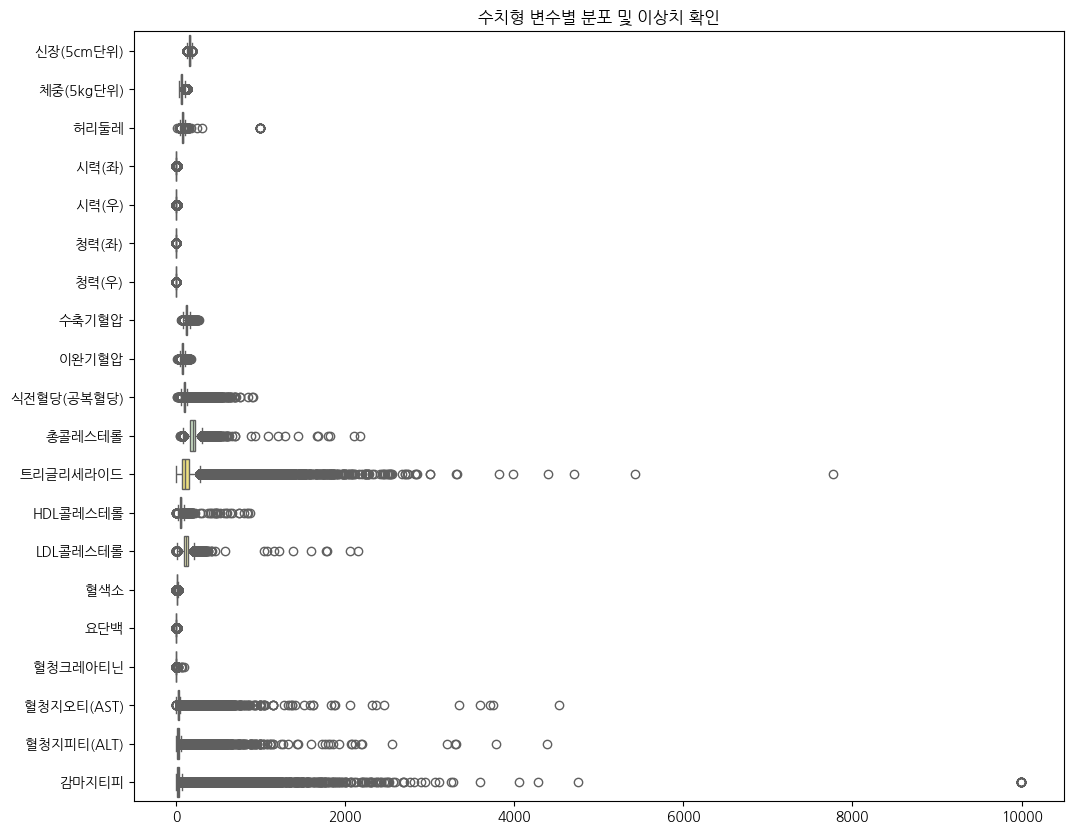

In [28]:
#수치형 변수 박스플롯- 세로형
plt.figure(figsize=(12,10))
sns.boxplot(data =numeric_cols, orient ='h', palette = 'Set3')
plt.title("수치형 변수별 분포 및 이상치 확인")
plt.show()

In [29]:
category_cols.columns

Index(['기준년도', '가입자일련번호', '시도코드', '성별', '연령대코드(5세단위)', '흡연상태', '음주여부',
       '구강검진수검여부', '치아우식증유무', '치석', '연령대'],
      dtype='object')

In [30]:
# 범주형 변수의 분포를 파악: 데이터가 각 카테고리별로 얼마나 균형 있게 퍼져 있는지, 혹은 특정 항목에 치우쳐 있는지를 확인하는 과정.
# 범주형 변수는 수치형 변수처럼 평균이나 표준편차를 계산할 수 없기 때문에, 주로 빈도나 비중을 중심으로 분석한다. 

### 속성 간의 관계 살펴보기

#### 문제11 : 상관관계 분석하기
- 수치형 데이터 간의 상관 관계를 계산하고 히트맵을 사용해 시각화해보세요.

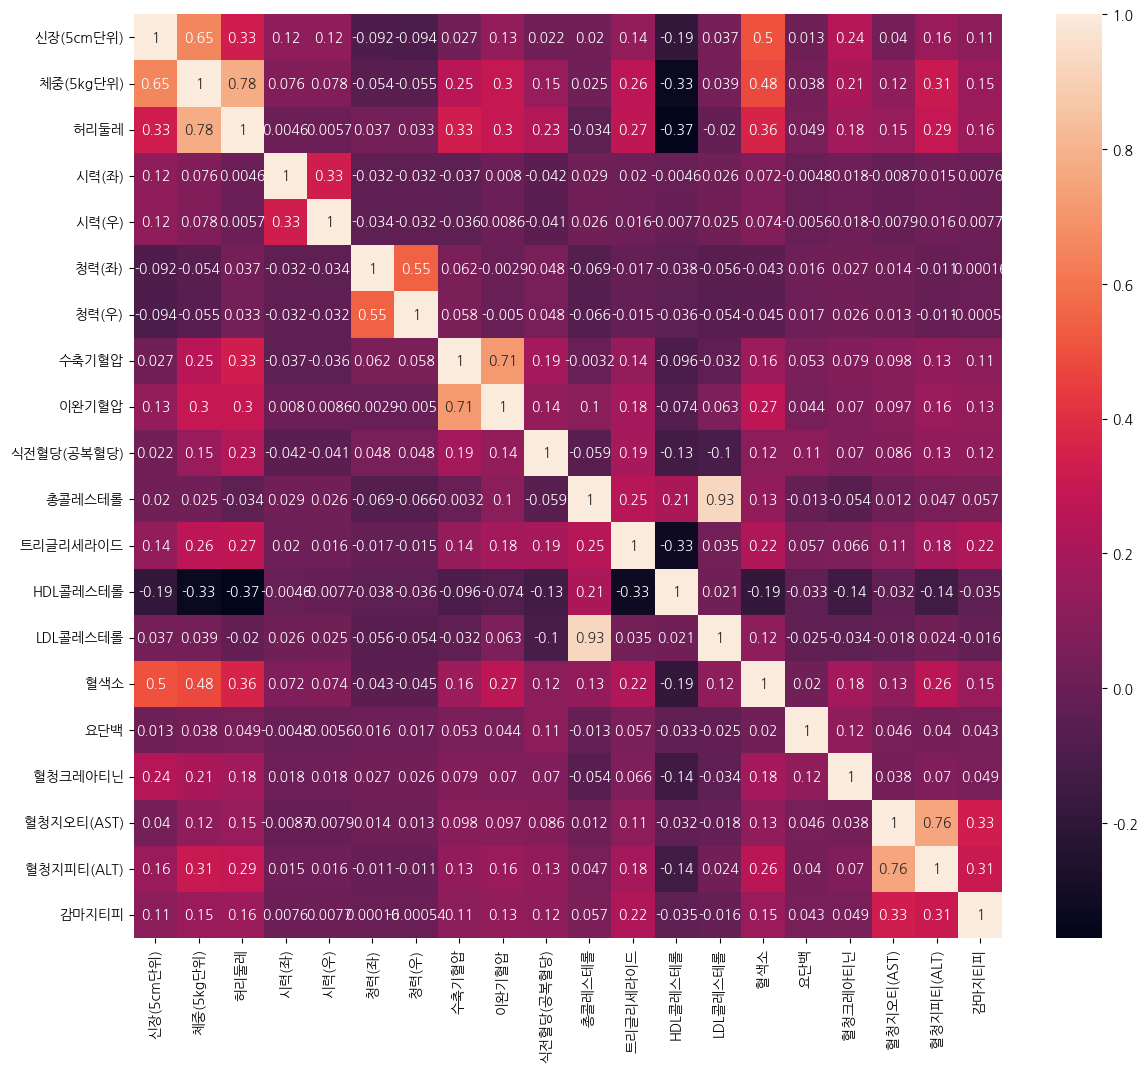

In [31]:
numeric_corr = numeric_cols.corr()
plt.figure(figsize= (14,12))
sns.heatmap(data=numeric_corr, annot = True)
plt.show()

In [32]:
# 위 시각화에서 찾을 수 있는 관계성은 어떤 것이 있나요?

- **이완기 혈압과 수축기 혈압**이 0.71로 높은 양의 상관관계를 보인다. 혈압의 두 지표는 심장 박동 주기에 따라 같이 움직이므로 높은 양의 상관관계가 나타나는 것이 생물학적으로도 매우 타당하다.

- **LDL콜레스테롤과 총콜레스테롤**이 0.93으로 아주 높은 양의 상관관계를 가진다. 총콜레스테롤 수치는 'HDL + LDL + (중성지방/5)'로 계산되기 때문에, 가장 큰 비중을 차지하는 LDL과 아주 높은 상관관계를 보이는 것이 타당하다.

- **HDL 콜레스테롤은 체중(5kg단위), 허리둘레, 트리글리세라이드**와 음의 상관관계를 가진다. 흔히 '좋은 콜레스테롤'로 불리는 HDL은 비만 지표(체중, 허리둘레)나 중성지방(트리그리세라이드) 수치가 높을수록 낮아지는 경향이 있는데, 데이터가 이를 정확히 보여주고 있다.

- **혈청지피티(ALT)와 혈청지오티(AST)**의 상관관계는 0.76으로 높은 양의 상관관계를 가진다. 두 지표 모두 간세포 손상 시 혈액으로 방출되는 효소이므로, 간 건강에 따라 함꼐 오르내는 특성이 있다.
-------------------------------------------------------------------------------
- **체중(5kg단위)과 허리둘레**의 상관관계가 0.78로 매우 높다. 이는 비만 분석 시 두 변수 중 하나만 사용해도 충분하거나, 두 변수를 조합해 BMI같은 새로운 지표를 만드는 것이 효율적임을 시사한다.
- **혈색소는 신장, 체중과** 각각 0.5, 0,48로 유의미한 양의 상관관계를 보인다. 일반적으로 체격이 클수록 혈액량이 많고 혈색소 수치가 높은 경향을 데이터가 뒷받침하고 있다. 
- **식전 혈당과 허리둘레**는 상관계수가 0.23 아주 높지는 않지만, 다른 지표들에 비해 식전혈당이 허리둘레나 체중과 연결되어 있음을 알 수 있다. 이는 복부 비만이 당뇨 리스크와 연관이 있다는 의학적 상식과 일치한다. 
- **감마지피티는 AST, ALT**와 각각 0.33, 0.31로 양의 상관관계를 보인다. 특히 음주와 밀접한 감마지피티가 간 수치들과 함꼐 움직이는 점은 향후 '음주여부'변수와 결합해 분석할 수 있을 것으로 보인다. 

#### 문제12 : 수치형 변수들 간의 산점도 및 각 변수의 히스토그램을 그려 보세요

- 4가지 변수('신장(5cm단위)', '체중(5kg단위)', '허리둘레', '수축기혈압')에 대한 시각화를 진행해보세요.

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 640x480 with 0 Axes>

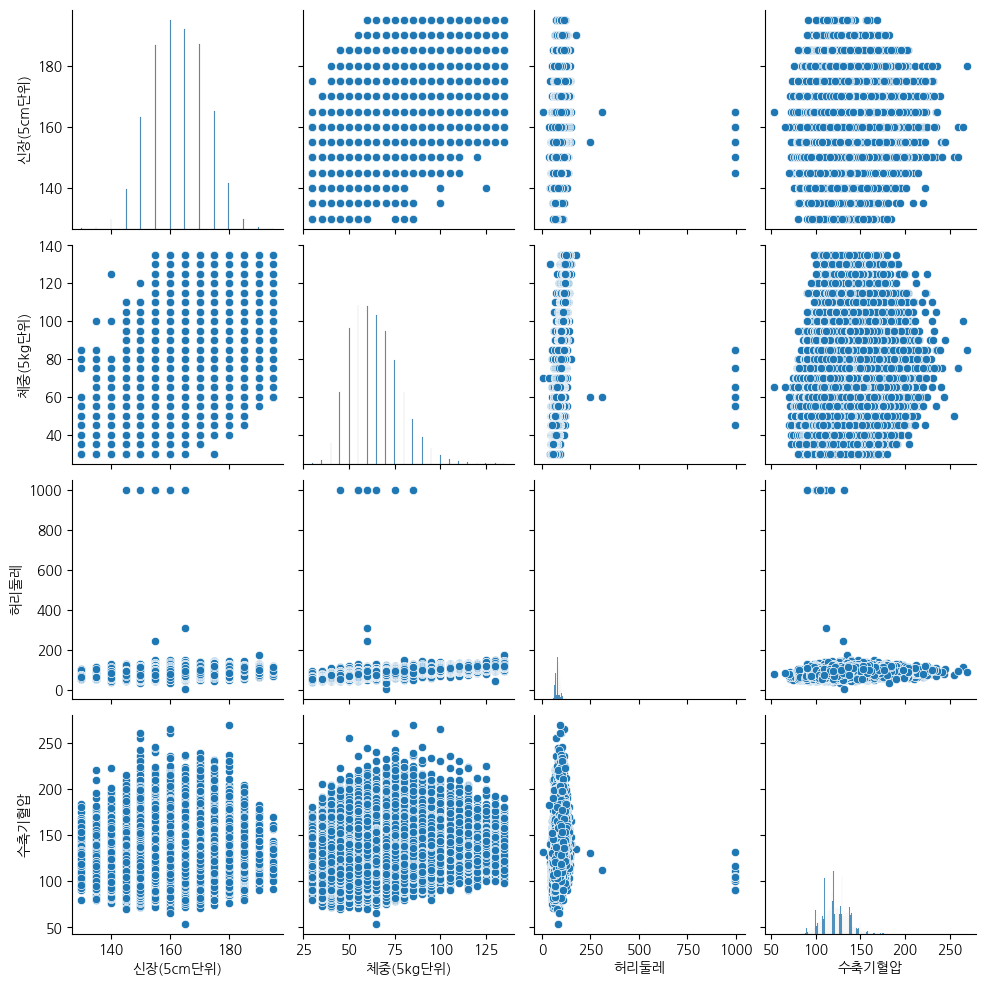

In [34]:
# 수치형 변수들에 대한 Pair Plot 그리기
plt.figure()
sns.pairplot(df[['신장(5cm단위)', '체중(5kg단위)', '허리둘레', '수축기혈압']]) 
#kind='reg': 산점도 위 회귀선 | corner =True : 하단 삼각형만 보여줌. | diag_kind='kde' : 부드러운 곡선(kde) 그림 분포의 밀도 파악하기에 유용
plt.show()


#### 문제13 : 성별에 따른 몇 가지 주요 수치형 변수(신장, 체중, 허리둘레, 수축기혈압)의 기술 통계 비교하기

- 범주형 변수에 따른 수치형 변수의 분포 분석해봅시다. 성별이 주요 건강 지표(신장, 체중, 허리둘레, 수축기혈압)에 어떻게 영향을 미치는지 파악하고 싶습니다.

- 카테고리별 수치형 변수의 기술 통계 분석: 각 카테고리별로 수치형 변수의 평균, 중앙값, 분산 등을 비교합니다.

In [ ]:
# 기술통계
  ㄴㄴ

#### 문제14 : 성별에 따른 몇 가지 주요 수치형 변수(신장, 체중, 허리둘레, 수축기혈압)의 분포를 비교하기

- 성별에 따른 몇 가지 주요 수치형 변수(신장, 체중, 허리둘레, 수축기혈압)의 분포를 시각화하여 비교해보세요.
- 시각화 방법은 자유롭게 선택하셔도 됩니다.

In [36]:
# 분포 - 히스토그램

In [37]:
# 위 시각화에서 어떤 인사이트를 확인할 수 있나요?


#### 문제15 : 성별에 따른 흡연상태의 비율을 시각화해보세요

In [38]:
# 히스토그램

In [39]:
# 위 시각화에서 어떤 인사이트를 확인할 수 있나요?


#### 문제16 : 연령대별로 주요 건강 지표(신장, 체중, 허리둘레, 수축기혈압)를 분석해보세요.
- 연령대별로 이러한 지표들의 평균 값을 계산하여 피봇테이블을 생성하세요.

In [40]:
# 위 데이터에서 어떤 인사이트를 확인할 수 있나요?



#### 문제17 : 각 지표별로 연령대에 따른 평균값의 변화 추이를 그래프로 시각화해보세요.

#### 문제18 : BMI를 계산하고, 각 범주별로 분류해부세요.

체질량 지수(BMI)는 개인의 체중(kg)을 신장(m)의 제곱으로 나눈 값으로 계산하며, 비만도를 판단하는 데 널리 사용됩니다. BMI를 계산하여 각 개인의 비만도를 분류해보세요.


$$BMI= \frac{체중(kg)}{신장(m)^2}$$

BMI에 따른 비만도 분류는 다음과 같습니다:

- 저체중: BMI < 18.5
- 정상 체중: 18.5 ≤ BMI < 25
- 과체중: 25 ≤ BMI < 30
- 비만: BMI ≥ 30

세계보건기구(WHO)의 BMI 분류는 다음과 같습니다:

- 저체중: BMI < 18.5
- 정상: 18.5 ≤ BMI < 24.9
- 과체중: 24.9 ≤ BMI < 30
- 비만: BMI ≥ 30

#### 문제19 : BMI 대한 기초 통계량을 확인해보세요.

In [41]:
# BMI에 관한 기초 통계량 계산


#### 문제20 : BMI에 대한 분포를 더 자세히 살펴보기 위해 히스토그램과 박스 플롯을 사용해 시각화해보세요.

In [42]:
# 위 시각화에서 어떤 인사이트를 확인할 수 있나요?


#### 문제21 : BMI 범주별 분포를 분석해보세요.
- 위에서 분류한 각 범주별로 인구 분포를 확인해보세요.

In [43]:
# 위 시각화에서 어떤 인사이트를 확인할 수 있나요?


#### 문제22 : 비만도(BMI 범주)와 다른 건강 지표(수축기혈압, 이완기혈압, 식전혈당) 간의 관계를 살펴보세요
- 기술 통계와 시각화를 모두 진행해주세요.

In [44]:
# 위 데이터에서 어떤 인사이트를 확인할 수 있나요?


#### 문제23 : 연령대 및 성별에 따른 BMI 변화를 분석해보세요.
- 연령대가 증가함에 따라 BMI가 어떻게 변화하는지, 그리고 남성과 여성 간의 차이가 있는지를 파악해보세요.
- 데이터를 성별과 연령대 코드로 그룹화하여 각 그룹의 평균 BMI를 계산하고 시각화해보세요.  

In [45]:
# 위 시각화에서 어떤 인사이트를 확인할 수 있나요?


## 마무리

다양한 통계 및 시각화 분석을 진행하였습니다. 모두들 수고하셨습니다.    
제공된 문제 이외에도 다양한 분석을 진행할 수 있습니다. 마음껏 도전해보세요!